In [62]:
import pickle

with open("lane_polynomials.obj", "rb") as f:
    d = pickle.load(f)
    print(d)

{'./final_5/proc_0141.png': {'coefficients': array([ 8.94034514e-04, -2.46656777e-01,  2.15034113e+01, -4.70173375e+02]), 'y': [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103], 'x': array([131, 132, 132, 132, 133, 133, 133, 132, 132, 132, 131, 131, 130,
       130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 118, 117,
       116, 115, 114, 113, 111, 110, 109, 108, 107, 106, 105, 104])}, './final_5/proc_0802.png': {'coefficients': array([-1.15740741e-03,  2.80976173e-01, -2.21873593e+01,  6.79205800e+02]), 'y': [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103], 'x': array([106, 106, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 112,
       112, 113, 113, 113, 114, 114, 114, 114, 114, 114, 114, 114, 114,
       113, 113, 112, 112, 111, 110])}, './final_5/proc_0825.png': {'coefficients': arr

In [222]:
import numpy as np
import h5py

filename = "camera_intrinsics.h5"
filenameEx = "extrinsics.h5"
main_K, main_distortion = None, None
with h5py.File(filename, "r") as data:

    main_K = np.array(data["main"]["K"])
    main_distortion = np.array(data["main"]["distortion"])

#get the main camera extrinsics

with h5py.File(filenameEx,"r") as data:
    main_EX = np.array(data["main"])
dist_pickle = {}

R_ex = main_EX[0:3, 0:3]


[[-0.52422453  6.86411393 -0.60753402  1.        ]
 [-0.53369222  6.89084588 -0.60753402  1.        ]
 [-0.54325315  6.91784112 -0.60753402  1.        ]
 [-0.55290872  6.94510357 -0.60753402  1.        ]
 [-0.56266034  6.9726372  -0.60753402  1.        ]
 [-0.57250944  7.0004461  -0.60753402  1.        ]
 [-0.5824575   7.0285344  -0.60753402  1.        ]
 [-0.59250602  7.05690634 -0.60753402  1.        ]
 [-0.60265653  7.08556623 -0.60753402  1.        ]
 [-0.62013487  7.11678847 -0.60753402  1.        ]
 [-0.63053483  7.14605973 -0.60753402  1.        ]
 [-0.64104201  7.17563278 -0.60753402  1.        ]
 [-0.65165809  7.2055123  -0.60753402  1.        ]
 [-0.66238475  7.23570309 -0.60753402  1.        ]
 [-0.67322375  7.26621004 -0.60753402  1.        ]
 [-0.6916583   7.29944794 -0.60753402  1.        ]
 [-0.70277101  7.33062658 -0.60753402  1.        ]
 [-0.714002    7.36213706 -0.60753402  1.        ]
 [-0.72535316  7.39398469 -0.60753402  1.        ]
 [-0.73682642  7.42617493 -0.60

(2, 8.524857425942287)

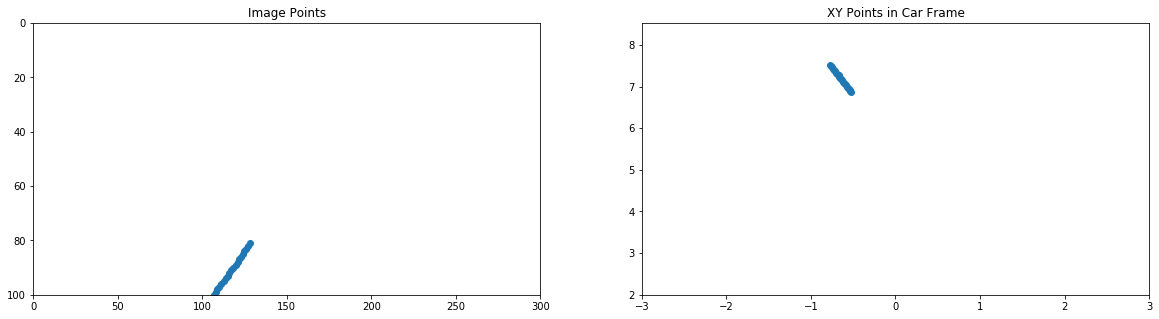

In [223]:
import matplotlib.pyplot as plt

def uvtoXYZ(u, v, main_k):
    image_vec = np.array([u, v, 1]).T # 2D points in image
    n = np.array([0, 0, 1]).T  #or is it [0,1,0]? .. normal vector in car/road frame
    
    h = 1.4660132 # height of main cam (z tranlastion in extrinsic)
    
    n_c = np.matmul(R_ex, n) #normal vector in cam frame

    V = h/(np.matmul(n_c.T ,np.matmul(np.linalg.inv(main_K),image_vec)))

    pts_in_camera_frame = V * np.matmul(np.linalg.inv(main_K),image_vec)
    return pts_in_camera_frame



y_pt = d['./final_5/proc_0141.png']['y']
x_pt = d['./final_5/proc_0141.png']['x']

test_points = np.array([[x_pt[i], y_pt[i]] for i in range(len(y_pt))  if y_pt[i] > 80])
xyz = np.array([uvtoXYZ(pt[1], pt[0], main_K) for pt in test_points])


ones = [[1] for i in range(len(xyz))] 
hom_xyz = np.concatenate((xyz, ones), axis=1)

out_points = np.array([np.matmul(np.linalg.inv(main_EX), pt) for pt in hom_xyz])

print(out_points)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(test_points[:, 0], test_points[:, 1], "o")
ax[0].set_xlim(0, 300)
ax[0].set_ylim(0, 100)
ax[0].set_title("Image Points")
ax[0].invert_yaxis()

ax[1].plot(out_points[:, 0], out_points[:, 1], "o")
ax[1].set_title("XY Points in Car Frame")
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(2, max(out_points[:, 1]) + 1)